In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import  train_test_split
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Dense
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle


In [ ]:
path = "myData" #veri setinin bulunduğu klasör

my_list = os.listdir(path) #klasördeki dosyaları listeler

nofClasses= len(my_list) #klasördeki dosya sayısını alır

print("Label sayisi",nofClasses) 

images = []
classNo = []

for i in range(nofClasses):
    myImageList = os.listdir(path+"\\"+str(i))  #klasördeki dosyaları listeler

    for j in myImageList:
        img = cv2.imread(path+"\\"+str(i)+"\\"+j) #resmi okur

        img = cv2.resize(img,(32,32)) #resmi yeniden boyutlandırır

        images.append(img) #resmi listeye ekler 
        classNo.append(i) #resmin sınıfını listeye ekler

print(len(images))
print(len(classNo))

images = np.array(images) #listeyi numpy dizisine çevirir

classNo = np.array(classNo) #listeyi numpy dizisine çevirir

print(images.shape)

#veriyi ayirma

x_train , x_test , y_train ,y_test = train_test_split(images,classNo,test_size=0.5,random_state=42) #veriyi eğitim ve test olarak ayırır

#x_train egitm için kullanılacak resimler 4064 tane
#x_test test için kullanılacak resimler 5080 tane
#x_validation doğrulama için kullanılacak resimler 1016 tane

x_train , x_validation , y_train ,y_validation = train_test_split(x_train,y_train,test_size=0.2,random_state=42) #eğitim verisini eğitim ve doğrulama olarak ayırır


print(images.shape)
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)


#vis

# fig,axs = plt.subplots(3,1,figsize=(7,7)) #3 satır 1 sütunluk bir figür oluşturur
# fig.subplots_adjust(hspace=0.5) #alttaki resimler arasında boşluk bırakır

# sns.countplot(x=y_train, ax=axs[0])
# axs[0].set_title("y_train")

# # y_test için countplot
# sns.countplot(x=y_test, ax=axs[1])
# axs[1].set_title("y_test")

# # x_validation için countplot
# sns.countplot(x=y_validation, ax=axs[2])
# axs[2].set_title("y_validation")



#preprocess

def preProcess(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #resmi griye çevirir
    img = cv2.equalizeHist(img) #resmi 255 e kadar genislettik
    img = img/255 #resmi normalize eder

    return img


# idx = 4000
# img= preProcess(x_train[idx])
# img = cv2.resize(img,(300,300))
# cv2.imshow("Preprocess",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


x_train = np.array(list(map(preProcess,x_train))) #eğitim verisini preprocess fonksiyonuna gönderir
x_test = np.array(list(map(preProcess,x_test))) #test verisini preprocess fonksiyonuna gönderir
x_validation = np.array(list(map(preProcess,x_validation))) #dogrulama verisini preprocess fonksiyonuna gönderir


x_train = x_train.reshape(-1,32,32,1) # eğitim verisini yeniden boyutlandırır
print(x_train.shape)
x_test = x_test.reshape(-1,32,32,1) # test verisini yeniden boyutlandırır
x_validation = x_validation.reshape(-1,32,32,1) # dogrulama verisini yeniden boyutlandırır

#data generate

dateGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1,rotation_range=10) #veri setini çeşitlendirir

dateGen.fit(x_train)

y_train = to_categorical(y_train,nofClasses) #eğitim verisini kategorik hale getirir   #one hot encoding ile ayni sey
y_test = to_categorical(y_test,nofClasses) #test verisini kategorik hale getirir
y_validation = to_categorical(y_validation,nofClasses) #doğrulama verisini kategorik hale getirir


#model

model = Sequential() #modeli oluşturur
model.add(Conv2D(input_shape = (32,32,1),filters=8,kernel_size=(5,5),activation="relu",padding="same")) #erisinim katmanı ekliyoruz
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same")) #erisinim katmanı ekliyoruz
model.add(MaxPooling2D(pool_size=(2,2))) #piksel havuzlama katmanı ekliyoruz

model.add(Dropout(0.2)) #seyreltme katmanı ekliyoruz


model.add(Flatten()) #düzleştirme katmanı ekliyoruz

model.add(Dense(units=256,activation="relu")) #yoğun katman ekliyoruz
model.add(Dropout(0.2)) #overfitting i engellemek için dropout ekledik

model.add(Dense(units=nofClasses,activation="softmax"))  #yoğun katman ekliyoruz


model.compile(loss = "categorical_crossentropy",optimizer=("Adam"),metrics = ["accuracy"]) #modeli derler

batch_size = 250

hist = model.fit(dateGen.flow(x_train,y_train,batch_size=batch_size),
                                        validation_data= (x_validation,y_validation),
                                        epochs=25,steps_per_epoch=x_train.shape[0]//batch_size,shuffle=1) #modeli eğitir


pickle_out=open("model_trained_new.p","wb") #modeli kaydeder
pickle.dump(model,pickle_out) #modeli kaydeder
pickle_out.close()






Label sayisi 10
10160
10160
(10160, 32, 32, 3)
(10160, 32, 32, 3)
(4064, 32, 32, 3)
(5080, 32, 32, 3)
(1016, 32, 32, 3)
(4064, 32, 32, 1)
Epoch 1/25


C:\Users\umuty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\umuty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1392 - loss: 2.2986 - val_accuracy: 0.5492 - val_loss: 1.9494
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2960 - loss: 2.0702 - val_accuracy: 0.6024 - val_loss: 1.9086
Epoch 3/25
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3760 - loss: 2.0382

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.752.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4354 - loss: 1.8937 - val_accuracy: 0.7510 - val_loss: 0.9558
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5400 - loss: 1.4158 - val_accuracy: 0.8100 - val_loss: 0.8911
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6188 - loss: 1.2097 - val_accuracy: 0.9094 - val_loss: 0.4218
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6840 - loss: 0.9465 - val_accuracy: 0.9045 - val_loss: 0.4189
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7325 - loss: 0.8816 - val_accuracy: 0.9341 - val_loss: 0.2684
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8281 - loss: 0.5112 - val_accuracy: 0.9311 - val_loss: 0.2635
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8051 - loss: 0.6274 - val_accuracy: 0.9370 - val_loss: 0.2097
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8440 - loss: 0.4917 - val_accuracy: 0.9409 - val_loss: 0.205

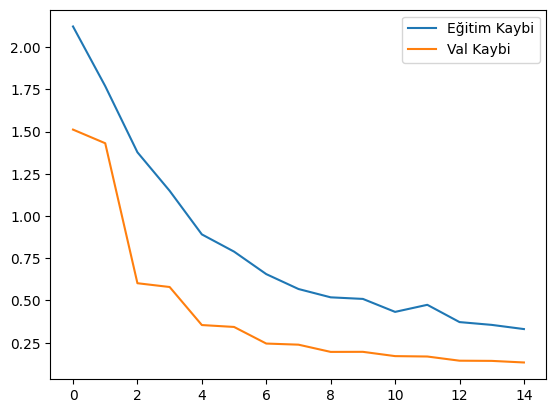

In [9]:
#degerlendirme
hist.history.keys()


plt.figure()
plt.plot(hist.history['loss'],label="Eğitim Kaybi")
plt.plot(hist.history['val_loss'],label="Val Kaybi")
plt.legend()
plt.show()


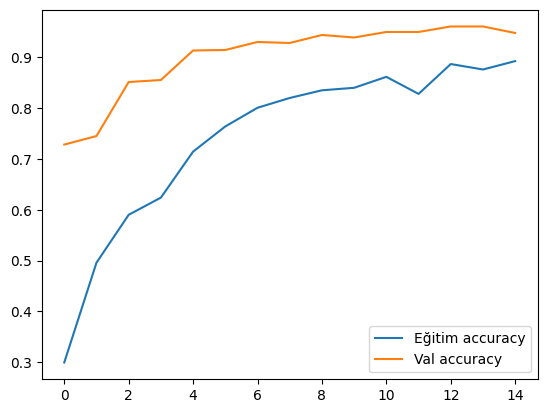

In [12]:
plt.figure()
plt.plot(hist.history['accuracy'],label="Eğitim accuracy")
plt.plot(hist.history['val_accuracy'],label="Val accuracy")
plt.legend()
plt.show()

In [14]:
score = model.evaluate(x_test,y_test,verbose=1) #test verisini değerlendirir

print("Test Loss",score[0])
print("Test Accuracy",score[1])



159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9659 - loss: 0.1220
Test Loss 0.1338825225830078
Test Accuracy 0.9614173173904419


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


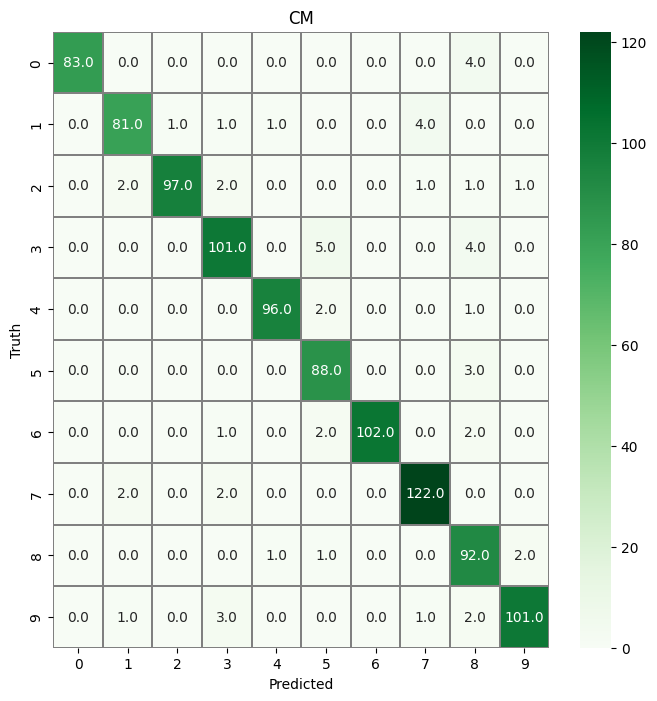

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_validation) #doğrulama verisini tahmin eder
y_pred_class = np.argmax(y_pred,axis=1) #tahmin edilen verilerin sınıfını alır

Y_true = np.argmax(y_validation,axis=1) #doğrulama verisinin sınıfını alır

cm = confusion_matrix(Y_true,y_pred_class) #confusion matrix oluşturur

f, ax = plt.subplots(figsize=(8,8))

sns.heatmap(cm,annot=True,linewidths=0.01,cmap="Greens",linecolor="gray",fmt=".1f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.title("CM")
plt.show()